In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Part 1

### Q1: Find the linear regression equation for mileage vs price

In [4]:
p1_X = df[['Mileage']].values
p1_y = df['Price'].values

In [5]:
regressor = linear_model.LinearRegression()
r1 = regressor.fit(p1_X, p1_y)

In [6]:
# y = mx + c
print(f'The equation for linear regression between mileage and price is;\ny = {r1.coef_[0]}x + {r1.intercept_}')

The equation for linear regression between mileage and price is;
y = -0.17252050279124928x + 24764.559006061685


### Q2: Chart the original data and the equation on the chart

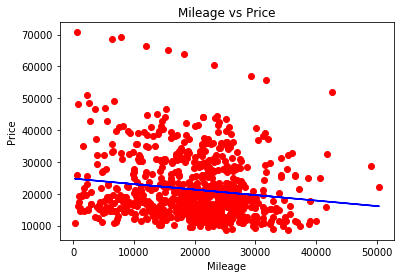

In [7]:
r1_y_pred = regressor.predict(p1_X)
plt.scatter(p1_X, p1_y, color = 'red')
plt.plot(p1_X, r1_y_pred, color = 'blue')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### Q3: Find the equation's  $𝑅^2$  score (use the .score method) to determine whether the equation is a good fit for this data

In [8]:
r1.score(p1_X, p1_y)

0.02046344732348926

The $R^2$ Squared Score is 0.0204, which is worst fit.

## Part 2

### Q1: Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation

In [9]:
p2_X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
p2_y = df['Price'].values

In [10]:
r2 = regressor.fit(p2_X, p2_y)

In [11]:
# y = mx + c
print(f'The linear equation of this model is:\ny = {regressor.coef_[0]}x + {regressor.intercept_}')

The linear equation of this model is:
y = -0.1697478323330369x + 6758.755143598082


### Q2: Find the equation's  $𝑅^2$  score (use the .score method) to determine whether the equation is a good fit for this data

In [12]:
regressor.score(p2_X, p2_y)

0.4462643536728379

The $R^2$ Squared Score is 0.44626, which is a average fit.

### Q3: Find the combination of the factors that is the best predictor for price

In [13]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df['Price']

In [14]:
len(X.columns)

7

In [15]:
import itertools
highest_comb = 0
max_reg = 0
for i in range(2, len(X.columns)):
    combination_i = list(itertools.combinations(list(X), i))
    for j in combination_i:
        reg = regressor.fit(X[list(j)].values, y.values)
        reg_r2 = reg.score(X[list(j)].values, y.values)
#         print(reg_r2)
        if reg_r2 > max_reg:
            max_reg = reg_r2
            highest_comb = list(j)
print(max_reg)
print(highest_comb)

0.4456909210587025
['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']


So, the combination of factors that is the best predictor for price is:<br>
'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather' with $R^2$ Score of 0.44569

## Hard Mode

### Q1: Research dummy variables in scikit-learn to see how to use the make, model, and body type

In [16]:
print('Make - ', df['Make'].unique())
print(len(df['Make'].unique()))
print('Model - ', df['Model'].unique())
print(len(df['Model'].unique()))
print('Trim - ', df['Trim'].unique())
print(len(df['Trim'].unique()))
print('Type - ', df['Type'].unique())
print(len(df['Type'].unique()))

Make -  ['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
6
Model -  ['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']
32
Trim -  ['Sedan 4D' 'CX Sedan 4D' 'CXL Sedan 4D' 'CXS Sedan 4D' 'Custom Sedan 4D'
 'Limited Sedan 4D' 'Special Ed Ultra 4D' 'DHS Sedan 4D' 'DTS Sedan 4D'
 'Hardtop Conv 2D' 'LS Hatchback 4D' 'LS Sedan 4D' 'LT Hatchback 4D'
 'LT Sedan 4D' 'SVM Hatchback 4D' 'SVM Sedan 4D' 'Coupe 2D' 'LS Coupe 2D'
 'LS Sport Coupe 2D' 'LS Sport Sedan 4D' 'Conv 2D' 'SS Sedan 4D'
 'LS MAXX Hback 4D' 'LT MAXX Hback 4D' 'MAXX Hback 4D' 'LT Coupe 2D'
 'SS Coupe 2D' 'GXP Sedan 4D' 'SE Sedan 4D' 'SLE Sedan 4D' 'GT Sedan 4D'
 'GT Coupe 2D' 'GTP Sedan 4D' 'AWD Sportwagon 4D' 'GT Sportwagon'
 'Sportwagon 4D' 'Linear Conv 2D' 'Linear Se

In [17]:
df_one_hot = pd.get_dummies(df, columns=['Make', 'Model', 'Type'], drop_first = True)

In [18]:
df_one_hot.columns

Index(['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5',
       'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V',
       'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic',
       'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6',
       'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala',
       'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre',
       'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue',
       'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe',
       'Model_XLR-V8', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan',
       'Type_Wagon'],
      dtype='object')

In [19]:
df_one_hot.shape

(804, 49)

In [20]:
df_one_hot.head(10)

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,15709.052821,22236,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,15230.003390,22576,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,15048.042184,22964,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,14862.093870,24021,Sedan 4D,6,3.1,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,15295.018267,27325,Sedan 4D,6,3.1,4,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


### Q4: Find the best combination of factors to predict price.

In [21]:
df_one_hot = pd.get_dummies(df, columns=['Make', 'Trim', 'Model', 'Type'], drop_first = True)

In [22]:
df_one_hot.shape

(804, 94)

In [23]:
df_one_hot.head(10)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,15709.052821,22236,6,3.1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,15230.003390,22576,6,3.1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,15048.042184,22964,6,3.1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,14862.093870,24021,6,3.1,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,15295.018267,27325,6,3.1,4,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
Price       804 non-null float64
Mileage     804 non-null int64
Make        804 non-null object
Model       804 non-null object
Trim        804 non-null object
Type        804 non-null object
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [25]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [26]:
df.drop_duplicates(inplace = True)

In [27]:
df_one_hot.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,0.659297,-0.404598,...,0.043206,0.182122,0.245852,-0.099518,-0.108849,0.472538,-0.168087,-0.206178,-0.034802,0.045134
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,-0.037472,-0.017505,...,-0.017213,-0.013937,-0.019672,0.017950,-0.004035,-0.014597,0.001510,-0.025691,-0.015905,0.027016
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.534896,-0.157535,...,0.084238,0.059189,0.221052,-0.102674,-0.180120,0.221052,-0.041657,-0.055019,0.180832,-0.269058
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.406216,-0.124052,...,0.110253,0.057154,0.158726,-0.085048,-0.220474,0.158726,0.046832,-0.125252,0.140098,-0.255308
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.087104,-0.145813,...,0.088848,0.062428,0.062428,-0.201742,0.109517,-0.201742,-0.825444,0.157973,0.694906,0.163594
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.190645,-0.293190,...,0.091602,0.064363,0.064363,-0.039653,-0.191212,0.064363,-0.040646,-0.264846,0.125714,-0.044285
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.091932,0.259566,...,-0.009958,-0.019017,-0.043057,0.077144,-0.117708,0.053104,0.097838,0.073544,-0.015079,-0.142362
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.205301,0.155492,...,-0.097844,0.069311,0.069311,0.069311,-0.113267,0.069311,0.063507,0.090697,-0.100940,-0.003375
Make_Cadillac,0.659297,-0.037472,0.534896,0.406216,0.087104,0.190645,-0.091932,0.205301,1.000000,-0.270289,...,-0.053092,0.337609,0.337609,-0.037305,-0.065443,0.337609,-0.152636,-0.094398,0.180930,-0.097757
Make_Chevrolet,-0.404598,-0.017505,-0.157535,-0.124052,-0.145813,-0.293190,0.259566,0.155492,-0.270289,1.000000,...,-0.129870,-0.091252,-0.091252,-0.091252,-0.160082,-0.091252,0.229685,0.349250,-0.182420,-0.239126


In [28]:
X = df_one_hot.drop('Price', axis = 1)
y = df_one_hot['Price']

In [29]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.06642631, 0.59096133, 1.21932983, 0.08309243, 0.18600896,
       0.        , 0.05781464, 0.20304403, 0.16687342, 0.09789094,
       0.25097864, 0.06604919, 0.02376753, 0.05712121, 0.02621307,
       0.02778112, 0.04176356, 0.02901043, 0.01934568, 0.02351411,
       0.02354118, 0.0283028 , 0.08148729, 0.02459354, 0.03585479,
       0.02412529, 0.02042665, 0.01396781, 0.01481706, 0.02073598,
       0.0238917 , 0.06438884, 0.01075989, 0.02879071, 0.02687408,
       0.017553  , 0.02441245, 0.01589356, 0.03591191, 0.01725993,
       0.03882485, 0.02198622, 0.03051285, 0.02282594, 0.02624518,
       0.02238006, 0.02815737, 0.01331393, 0.03490198, 0.01569353,
       0.01916878, 0.02105247, 0.01707918, 0.03337298, 0.05014153,
       0.03229581, 0.02402311, 0.01455012, 0.03273947, 0.07937328,
       0.07866288, 0.05207901, 0.19636223, 0.04547306, 0.04432318,
       0.03169784, 0.10981955, 0.01579872, 0.01339714, 0.0876854 ,
       0.05839105, 0.07265473, 0.02191324, 0.02412086, 0.02615

In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Liter                       1.219330
Cylinder                    0.590961
Make_SAAB                   0.250979
Make_Cadillac               0.203044
Model_AVEO                  0.196362
Cruise                      0.186009
Make_Chevrolet              0.166873
Model_Cavalier              0.109820
Model_Malibu                0.108534
Make_Pontiac                0.097891
Type_Hatchback              0.095672
Model_Cobalt                0.087685
Doors                       0.083092
Trim_Coupe 2D               0.081487
Model_9_3 HO                0.079373
Model_9_5                   0.078663
Model_Ion                   0.073576
Model_Deville               0.072655
Mileage                     0.066426
Make_Saturn                 0.066049
Trim_Hardtop Conv 2D        0.064389
Model_XLR-V8                0.064389
Type_Wagon                  0.064370
Type_Coupe                  0.060801
Model_Corvette              0.058391
Leather                     0.057815
Trim_Aero Sedan 4D          0.057121
M

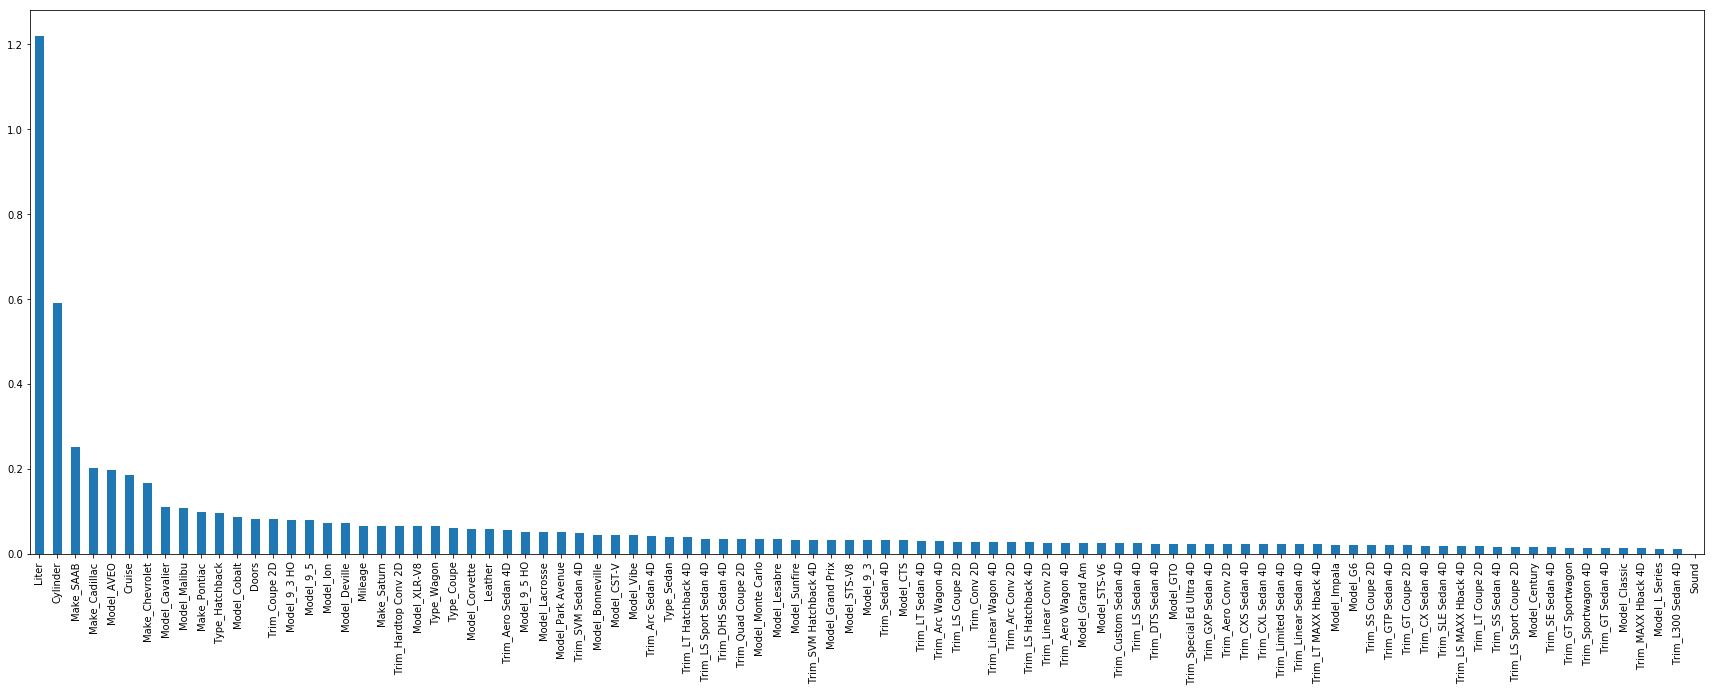

In [31]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30,10))

In [32]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X, y)

SelectPercentile(percentile=20,
         score_func=<function mutual_info_regression at 0x0000020933137840>)

In [33]:
selected_top_columns.get_support()

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False])

In [34]:
X.columns[selected_top_columns.get_support()]

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Trim_Coupe 2D',
       'Model_9_3 HO', 'Model_9_5', 'Model_AVEO', 'Model_Cavalier',
       'Model_Cobalt', 'Model_Deville', 'Model_Ion', 'Model_Malibu',
       'Type_Hatchback'],
      dtype='object')

The data is big, so we used mutual info regression to find the best features to train the models.<br>
the best combination of factors to predict price are:<br>
'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB',<br>
'Trim_Coupe 2D', 'Model_9_3 HO', 'Model_9_5', 'Model_AVEO', 'Model_Cavalier', 'Model_Cobalt', 'Model_Deville',<br>
'Model_Ion', 'Model_Malibu', 'Type_Hatchback'